In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
import scipy
from scipy import stats
import os


Correlation helper function

In [34]:
def corr_scatter(data, x, y, title): 
    xlim = data.loc[:,x].min() 
    ylim = data.loc[:,y].max() - data.loc[:,y].std()
    sns.lmplot(x=x, y=y, data=data, scatter_kws={"s": 6})
    per = stats.pearsonr(data[x], data[y])
    plt.title(title) 
    plt.text(xlim, ylim, 'Pearson corr {} \np_value {:e}'.format(round(per[0],3),per[1]), horizontalalignment='left', size='large', color='black')
    if x == 'PEBP1':
        plt.xlabel('RKIP')
    if y == 'PEBP1':
        plt.ylabel('RKIP')

    plt.show()


Other Helper Functions

In [4]:
def flotify(data):
    c = data.columns
    for i in c:
        data[i] = data[i].astype('float')


def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def ind_change(data):
    ind = list(data.index)
    indn = []
    for i in ind:
        indn.append(i.strip())
    indn
    data.index = indn
    return data




def KS_Score_Finder(Dataset):
    a = pd.DataFrame([[0]*len(Dataset.T)])
    a.columns = Dataset.columns
    a.index = ['KS_Score']
    a.loc['KS_Mes_Score'] = 0 
    a.loc['KS_Mes_p_Value'] = 0 
    a.loc['KS_Epi_Score'] = 0 
    a.loc['KS_Epi_p_value'] = 0 

    for i in Dataset.columns:
        KS_MesGrt = scipy.stats.ks_2samp(Dataset.loc[intersection(Dataset.index, KS_Tumor_Mes),].loc[:,i],Dataset.loc[intersection(Dataset.index, KS_Tumor_Epi),].loc[:,i], alternative='greater')
        KS_EpiGrt = scipy.stats.ks_2samp(Dataset.loc[intersection(Dataset.index, KS_Tumor_Epi),].loc[:,i],Dataset.loc[intersection(Dataset.index, KS_Tumor_Mes),].loc[:,i], alternative='greater')
        a.loc['KS_Mes_Score',i] = KS_MesGrt[0]
        a.loc['KS_Mes_p_Value',i] = KS_MesGrt[1]
        a.loc['KS_Epi_Score',i] = KS_EpiGrt[0]
        a.loc['KS_Epi_p_value',i] = KS_EpiGrt[1]
        #print(i)


    for i in Dataset.columns:
        #print(i)
        if a.loc['KS_Mes_p_Value',i] < 0.05:
            a.loc['KS_Score',i] = -1*a.loc['KS_Mes_Score',i]
        
        elif a.loc['KS_Epi_p_value',i] < 0.05:
            a.loc['KS_Score',i] = a.loc['KS_Epi_Score',i]
        
        elif a.loc['KS_Epi_Score',i] > a.loc['KS_Mes_Score',i]:
            a.loc['KS_Score',i] = a.loc['KS_Epi_Score',i]
        
        else: 
            a.loc['KS_Score',i] = -1*a.loc['KS_Mes_Score',i]
        
    return a

##### Import All TCGA DataSets from UCSC Xena Browser

In [8]:
TCGA_ACC_scored = pd.read_csv('Data_Figure1_2/TCGA_ACC.csv', index_col=0)
TCGA_BLCA_scored = pd.read_csv('Data_Figure1_2/TCGA_BLCA.csv', index_col=0)
TCGA_BRCA_scored= pd.read_csv('Data_Figure1_2/TCGA_BRCA.csv', index_col=0)
TCGA_CESC_scored =pd.read_csv('Data_Figure1_2/TCGA_CESC.csv', index_col=0)
TCGA_CHOL_scored= pd.read_csv('Data_Figure1_2/TCGA_CHOL.csv', index_col=0)
TCGA_COAD_scored= pd.read_csv('Data_Figure1_2/TCGA_COAD.csv', index_col=0)
TCGA_COADREAD_scored = pd.read_csv('Data_Figure1_2/TCGA_COADREAD.csv', index_col=0)
TCGA_ESCA_scored= pd.read_csv('Data_Figure1_2/TCGA_ESCA.csv', index_col=0)
TCGA_GBM_scored= pd.read_csv('Data_Figure1_2/TCGA_GBM.csv', index_col=0)
TCGA_GBMLGG_scored= pd.read_csv('Data_Figure1_2/TCGA_GBMLGG.csv', index_col=0)
TCGA_HNSC_scored= pd.read_csv('Data_Figure1_2/TCGA_HNSC.csv', index_col=0)
TCGA_KICH_scored= pd.read_csv('Data_Figure1_2/TCGA_KICH.csv', index_col=0)
TCGA_KIRC_scored= pd.read_csv('Data_Figure1_2/TCGA_KIRC.csv', index_col=0)
TCGA_KIRP_scored= pd.read_csv('Data_Figure1_2/TCGA_KIRP.csv', index_col=0)
TCGA_LAML_scored= pd.read_csv('Data_Figure1_2/TCGA_LAML.csv', index_col=0)
TCGA_LGG_scored= pd.read_csv('Data_Figure1_2/TCGA_LGG.csv', index_col=0)
TCGA_LIHC_scored= pd.read_csv('Data_Figure1_2/TCGA_LIHC.csv', index_col=0)
TCGA_LUAD_scored= pd.read_csv('Data_Figure1_2/TCGA_LUAD.csv', index_col=0)
TCGA_LUNG_scored= pd.read_csv('Data_Figure1_2/TCGA_LUNG.csv', index_col=0)
TCGA_LUSC_scored= pd.read_csv('Data_Figure1_2/TCGA_LUSC.csv', index_col=0)
TCGA_MESO_scored= pd.read_csv('Data_Figure1_2/TCGA_MESO.csv', index_col=0)
TCGA_OV_scored= pd.read_csv('Data_Figure1_2/TCGA_OV.csv', index_col=0)
TCGA_PAAD_scored= pd.read_csv('Data_Figure1_2/TCGA_PAAD.csv', index_col=0)
TCGA_PCPG_scored= pd.read_csv('Data_Figure1_2/TCGA_PCPG.csv', index_col=0)
TCGA_PRAD_scored= pd.read_csv('Data_Figure1_2/TCGA_PRAD.csv', index_col=0)
TCGA_READ_scored= pd.read_csv('Data_Figure1_2/TCGA_READ.csv', index_col=0)
TCGA_SARC_scored= pd.read_csv('Data_Figure1_2/TCGA_SARC.csv', index_col=0)
TCGA_SKCM_scored= pd.read_csv('Data_Figure1_2/TCGA_SKCM.csv', index_col=0)
TCGA_STAD_scored= pd.read_csv('Data_Figure1_2/TCGA_STAD.csv', index_col=0)
TCGA_TGCT_scored= pd.read_csv('Data_Figure1_2/TCGA_TCGT.csv', index_col=0)
TCGA_THCA_scored= pd.read_csv('Data_Figure1_2/TCGA_THCA.csv', index_col=0)
TCGA_THYM_scored= pd.read_csv('Data_Figure1_2/TCGA_THYM.csv', index_col=0)
TCGA_UCEC_scored= pd.read_csv('Data_Figure1_2/TCGA_UCEC.csv', index_col=0)
TCGA_UCS_scored= pd.read_csv('Data_Figure1_2/TCGA_USC.csv', index_col=0)
TCGA_UVM_scored= pd.read_csv('Data_Figure1_2/TCGA_UVM.csv', index_col=0)

Figure 2C

In [9]:
def corr_scatter(data, x, y, title, xlim='A',ylim='A', dpi=100 , xlabel='A', ylabel='A'): 
    per = stats.spearmanr(data[x], data[y])
    if xlim == "A":
        if per[0]>0:
            xlim = data.loc[:,x].min() 
        else:
            xlim = data.loc[:,x].max() - data.loc[:,x].mean() 
        
    if ylim == "A":
        if per[0]>0:
            ylim = data.loc[:,y].max() 
        else:
            ylim = data.loc[:,y].min() 

    print(xlim)

    print(ylim)
    plt.rcParams['figure.dpi']= dpi
    sns.lmplot(x=x, y=y, data=data, scatter_kws={"s": 6 })
    per = stats.spearmanr(data[x], data[y])
    plt.title(title)
    
    if per[1] <0.0001:
        
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value < 1e-04'.format(round(per[0],3)), horizontalalignment='left', size=13, color='Black', fontname='Arial')
    else:
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value {}'.format(round(per[0],2),round(per[1],3)), horizontalalignment='left', size=13, color='Black',  fontname='Arial')
    
    plt.ylabel(y,fontsize=14, fontweight='bold', fontname='Arial')
    plt.xlabel(x,fontsize=14, fontweight='bold',fontname='Arial')


    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    if xlabel != 'A':
        plt.xlabel(xlabel, fontsize=14) 
    if ylabel != 'A':
        plt.ylabel(ylabel, fontsize=14) 

    plt.show()


In [35]:
def corr_scatter(data, x, y, title, xlim='A',ylim='A', dpi=100 , xlabel='A', ylabel='A'): 
    per = stats.spearmanr(data[x], data[y])
    if xlim == "A":
        if per[0]>0:
            xlim = data.loc[:,x].min() 
        else:
            xlim = data.loc[:,x].max() - data.loc[:,x].mean() 
        
    if ylim == "A":
        if per[0]>0:
            ylim = data.loc[:,y].max() 
        else:
            ylim = data.loc[:,y].min() 

    print(xlim)

    print(ylim)
    plt.rcParams['figure.dpi']= dpi
    sns.lmplot(x=x, y=y, data=data, scatter_kws={"s": 6 })
    per = stats.spearmanr(data[x], data[y])
    plt.title(title)
    print(per[1])
    if per[1] <0.0001:
        
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value < 1e-04'.format(round(per[0],3)),
                 horizontalalignment='left', size=16, color='Black', fontname='Arial')
    elif per[1] <0.001:
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value {}'.format(round(per[0],3),round(per[1],4)), horizontalalignment='left', size=16, 
                                                                     color='Black',  fontname='Arial')
    elif per[1] <0.01:
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value {}'.format(round(per[0],3),round(per[1],3)), horizontalalignment='left', size=16, 
                                                                     color='Black',  fontname='Arial')
        
    else:
        plt.text(xlim, ylim, 'Spearman corr {} \n p_value {}'.format(round(per[0],3),round(per[1],2)), horizontalalignment='left', size=16, 
                 color='Black',  fontname='Arial')
    
    plt.ylabel(y,fontsize=18, fontweight='bold', fontname='Arial')
    plt.xlabel(x,fontsize=18, fontweight='bold',fontname='Arial')

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    if xlabel != 'A':
        plt.xlabel(xlabel, fontsize=18) 
    if ylabel != 'A':
        plt.ylabel(ylabel, fontsize=18) 

    plt.show()


In [12]:
def EM_kde_plot(Network, EM_upper , EM_lower ):
    plt.figure(figsize=(20, 30))
    #sns.set_palette(palette)
    sns.displot(Network, x="ESR1", fill=True, bins = 120 ,kde = True, color = 'red')
    plt.rcParams['figure.dpi']= 100

    plt.axvline(x = EM_lower, color = 'black', linestyle = ':')
    plt.axvline(x = EM_upper, color = 'black', linestyle = ':')

    plt.xticks(fontsize = 14, fontname='Arial')
    plt.yticks(fontsize = 14, fontname='Arial')
    plt.xlabel('ESR1',fontsize = 14, fontname='Arial',  fontweight='bold')

    plt.ylabel('Frequency',fontsize = 14, fontname='Arial',  fontweight='bold')

##### Plotting Correlation Heatmap

In [13]:
Corr_Tab_Gly = pd.DataFrame([[0]*3]*35).T

Corr_Tab_Gly.index = ['KLF6 vs NOS2','NOS2 vs ZFP36','KLF6 vs ZFP36' ]
Corr_Tab_Gly.columns = ['TCGA_ACC', 'TCGA_BLCA', 'TCGA_BRCA', 'TCGA_CESC','TCGA_CHOL', 'TCGA_COAD','TCGA_COADREAD','TCGA_ESCA','TCGA_GBM','TCGA_GBMLGG','TCGA_HNSC','TCGA_KICH','TCGA_KIRC','TCGA_KIRP','TCGA_LAML','TCGA_LGG','TCGA_LIHC','TCGA_LUAD','TCGA_LUNG','TCGA_LUSC','TCGA_MESO','TCGA_OV','TCGA_PAAD','TCGA_PCPG','TCGA_PRAD','TCGA_READ','TCGA_SARC','TCGA_SKCM','TCGA_STAD','TCGA_TGCT','TCGA_THCA','TCGA_THYM','TCGA_UCEC','TCGA_UCS','TCGA_UVM']
Corr_Tab_Gly


,TCGA_ACC,TCGA_BLCA,TCGA_BRCA,TCGA_CESC,TCGA_CHOL,TCGA_COAD,TCGA_COADREAD,TCGA_ESCA,TCGA_GBM,TCGA_GBMLGG,...,TCGA_READ,TCGA_SARC,TCGA_SKCM,TCGA_STAD,TCGA_TGCT,TCGA_THCA,TCGA_THYM,TCGA_UCEC,TCGA_UCS,TCGA_UVM
KLF6 vs NOS2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOS2 vs ZFP36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KLF6 vs ZFP36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tcga_datasets = [TCGA_ACC_scored,TCGA_BLCA_scored, TCGA_BRCA_scored, TCGA_CESC_scored, 
TCGA_CHOL_scored,TCGA_COAD_scored,TCGA_COADREAD_scored,TCGA_ESCA_scored,TCGA_GBM_scored ,TCGA_GBMLGG_scored, TCGA_HNSC_scored ,
TCGA_KICH_scored ,TCGA_KIRC_scored,TCGA_KIRP_scored ,TCGA_LAML_scored,
TCGA_LGG_scored,TCGA_LIHC_scored,TCGA_LUAD_scored ,TCGA_LUNG_scored ,
TCGA_LUSC_scored ,TCGA_MESO_scored ,TCGA_OV_scored,TCGA_PAAD_scored, 
TCGA_PCPG_scored ,TCGA_PRAD_scored ,TCGA_READ_scored ,TCGA_SARC_scored ,
TCGA_SKCM_scored ,TCGA_STAD_scored ,TCGA_TGCT_scored ,TCGA_THCA_scored,
TCGA_THYM_scored ,TCGA_UCEC_scored,TCGA_UCS_scored ,TCGA_UVM_scored ] 

tcga_labels = Corr_Tab_Gly.columns



##### Finding Spearman Correlation for KLF6, NOS2 and ZFP36 with Each Other

In [15]:
def corr_table(Corr_Tab_Gly, data, y,i):
    Corr_Tab_Gly.loc['KLF6 vs NOS2', y]  = stats.spearmanr( data['KLF6'], data['NOS2'])[i]
    Corr_Tab_Gly.loc['NOS2 vs ZFP36', y]  = stats.spearmanr( data['NOS2'], data['ZFP36'])[i]
    Corr_Tab_Gly.loc['KLF6 vs ZFP36', y]  = stats.spearmanr( data['KLF6'], data['ZFP36'])[i]

In [16]:
for i in range(len(tcga_datasets)):
    corr_table(Corr_Tab_Gly, tcga_datasets[i].T, tcga_labels[i], 1)


C:\Users\saish\AppData\Local\Temp\ipykernel_11324\3979444040.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9853906729140143' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Corr_Tab_Gly.loc['KLF6 vs NOS2', y]  = stats.spearmanr( data['KLF6'], data['NOS2'])[i]
C:\Users\saish\AppData\Local\Temp\ipykernel_11324\3979444040.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7563306064790332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Corr_Tab_Gly.loc['KLF6 vs NOS2', y]  = stats.spearmanr( data['KLF6'], data['NOS2'])[i]
C:\Users\saish\AppData\Local\Temp\ipykernel_11324\3979444040.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.059130085068234e-1

In [17]:
Corr_Tab_Gly_star = Corr_Tab_Gly.copy()
Corr_Tab_Gly_star 

,TCGA_ACC,TCGA_BLCA,TCGA_BRCA,TCGA_CESC,TCGA_CHOL,TCGA_COAD,TCGA_COADREAD,TCGA_ESCA,TCGA_GBM,TCGA_GBMLGG,...,TCGA_READ,TCGA_SARC,TCGA_SKCM,TCGA_STAD,TCGA_TGCT,TCGA_THCA,TCGA_THYM,TCGA_UCEC,TCGA_UCS,TCGA_UVM
KLF6 vs NOS2,0.985391,7.563306e-01,6.059130e-12,4.793220e-02,0.054927,8.610097e-06,4.826382e-05,7.530299e-01,3.252384e-01,5.990062e-03,...,8.086451e-01,2.380513e-02,0.012413,5.728482e-05,3.745186e-08,1.369068e-03,5.962661e-08,3.980722e-05,0.698465,0.275271
NOS2 vs ZFP36,0.001051,6.224069e-01,4.672429e-07,8.600613e-01,0.024945,9.636570e-08,6.183409e-06,6.973423e-01,7.510064e-01,4.038783e-02,...,8.310936e-01,3.632679e-04,0.004949,4.935941e-01,6.025096e-02,1.950936e-04,2.865889e-01,3.816944e-04,0.291418,0.957374
KLF6 vs ZFP36,0.015888,1.537229e-37,5.523430e-155,1.604421e-29,0.000008,3.808553e-39,3.224770e-51,8.818988e-19,2.916450e-15,8.577554e-113,...,1.225779e-12,1.066468e-10,0.000580,4.494313e-26,2.776880e-17,8.169038e-117,2.168370e-17,1.336634e-26,0.000033,0.173902


##### * is added to indicate p-value less than 0.05 

In [18]:
for i in range(len(Corr_Tab_Gly_star.columns)):
    for j in range(len(Corr_Tab_Gly_star.index)):
        if Corr_Tab_Gly_star.iloc[j,i] < 0.05 :
            Corr_Tab_Gly_star.iloc[j,i] = '*'
        else:
            Corr_Tab_Gly_star.iloc[j,i] = ''
        


C:\Users\saish\AppData\Local\Temp\ipykernel_11324\1740557219.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Corr_Tab_Gly_star.iloc[j,i] = ''
C:\Users\saish\AppData\Local\Temp\ipykernel_11324\1740557219.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '*' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Corr_Tab_Gly_star.iloc[j,i] = '*'


In [19]:
Corr_Tab_Gly_star

,TCGA_ACC,TCGA_BLCA,TCGA_BRCA,TCGA_CESC,TCGA_CHOL,TCGA_COAD,TCGA_COADREAD,TCGA_ESCA,TCGA_GBM,TCGA_GBMLGG,...,TCGA_READ,TCGA_SARC,TCGA_SKCM,TCGA_STAD,TCGA_TGCT,TCGA_THCA,TCGA_THYM,TCGA_UCEC,TCGA_UCS,TCGA_UVM
KLF6 vs NOS2,,,*,*,,*,*,,,*,...,,*,*,*,*,*,*,*,,
NOS2 vs ZFP36,*,,*,,*,*,*,,,*,...,,*,*,,,*,,*,,
KLF6 vs ZFP36,*,*,*,*,*,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,


In [20]:

for i in range(len(tcga_datasets)):
    corr_table(Corr_Tab_Gly, tcga_datasets[i].T, tcga_labels[i], 0)


In [21]:
Corr_Tab_Gly

,TCGA_ACC,TCGA_BLCA,TCGA_BRCA,TCGA_CESC,TCGA_CHOL,TCGA_COAD,TCGA_COADREAD,TCGA_ESCA,TCGA_GBM,TCGA_GBMLGG,...,TCGA_READ,TCGA_SARC,TCGA_SKCM,TCGA_STAD,TCGA_TGCT,TCGA_THCA,TCGA_THYM,TCGA_UCEC,TCGA_UCS,TCGA_UVM
KLF6 vs NOS2,0.002094,-0.015078,0.195384,-0.112804,-0.288142,0.242555,0.193779,0.022501,0.075453,0.103634,...,0.023917,0.138830,-0.114761,0.195721,0.423085,0.133537,0.466818,0.285523,0.052438,-0.123454
NOS2 vs ZFP36,0.361839,-0.023926,0.143790,0.010086,-0.333992,0.288851,0.215044,-0.027809,-0.024369,0.077385,...,-0.021066,0.217424,0.128886,0.033617,0.150788,0.155157,0.097250,0.248185,-0.142179,0.006071
KLF6 vs ZFP36,0.270545,0.566583,0.662835,0.583731,0.612516,0.638950,0.639192,0.574478,0.554652,0.719182,...,0.623395,0.383228,0.157463,0.485730,0.610176,0.777305,0.672625,0.660850,0.520629,0.153541


##### Downloading the Spearman Correlation Data Frame

In [31]:
Corr_Tab_Gly.to_csv("Spearman.csv")
Corr_Tab_Gly_star.to_csv("Spearman_pvalue.csv")

Plotting Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5]),
 [Text(0.5, 0, 'TCGA_ACC'),
  Text(1.5, 0, 'TCGA_BLCA'),
  Text(2.5, 0, 'TCGA_BRCA'),
  Text(3.5, 0, 'TCGA_CESC'),
  Text(4.5, 0, 'TCGA_CHOL'),
  Text(5.5, 0, 'TCGA_COAD'),
  Text(6.5, 0, 'TCGA_COADREAD'),
  Text(7.5, 0, 'TCGA_ESCA'),
  Text(8.5, 0, 'TCGA_GBM'),
  Text(9.5, 0, 'TCGA_GBMLGG'),
  Text(10.5, 0, 'TCGA_HNSC'),
  Text(11.5, 0, 'TCGA_KICH'),
  Text(12.5, 0, 'TCGA_KIRC'),
  Text(13.5, 0, 'TCGA_KIRP'),
  Text(14.5, 0, 'TCGA_LAML'),
  Text(15.5, 0, 'TCGA_LGG'),
  Text(16.5, 0, 'TCGA_LIHC'),
  Text(17.5, 0, 'TCGA_LUAD'),
  Text(18.5, 0, 'TCGA_LUNG'),
  Text(19.5, 0, 'TCGA_LUSC'),
  Text(20.5, 0, 'TCGA_MESO'),
  Text(21.5, 0, 'TCGA_OV'),
  Text(22.5, 0, 'TCGA_PAAD'),
  Text(23.5, 0, 'TCGA_PCPG'),
  Text(24.5, 0, 'TCGA_PRAD'),
  Text(25.5, 0,

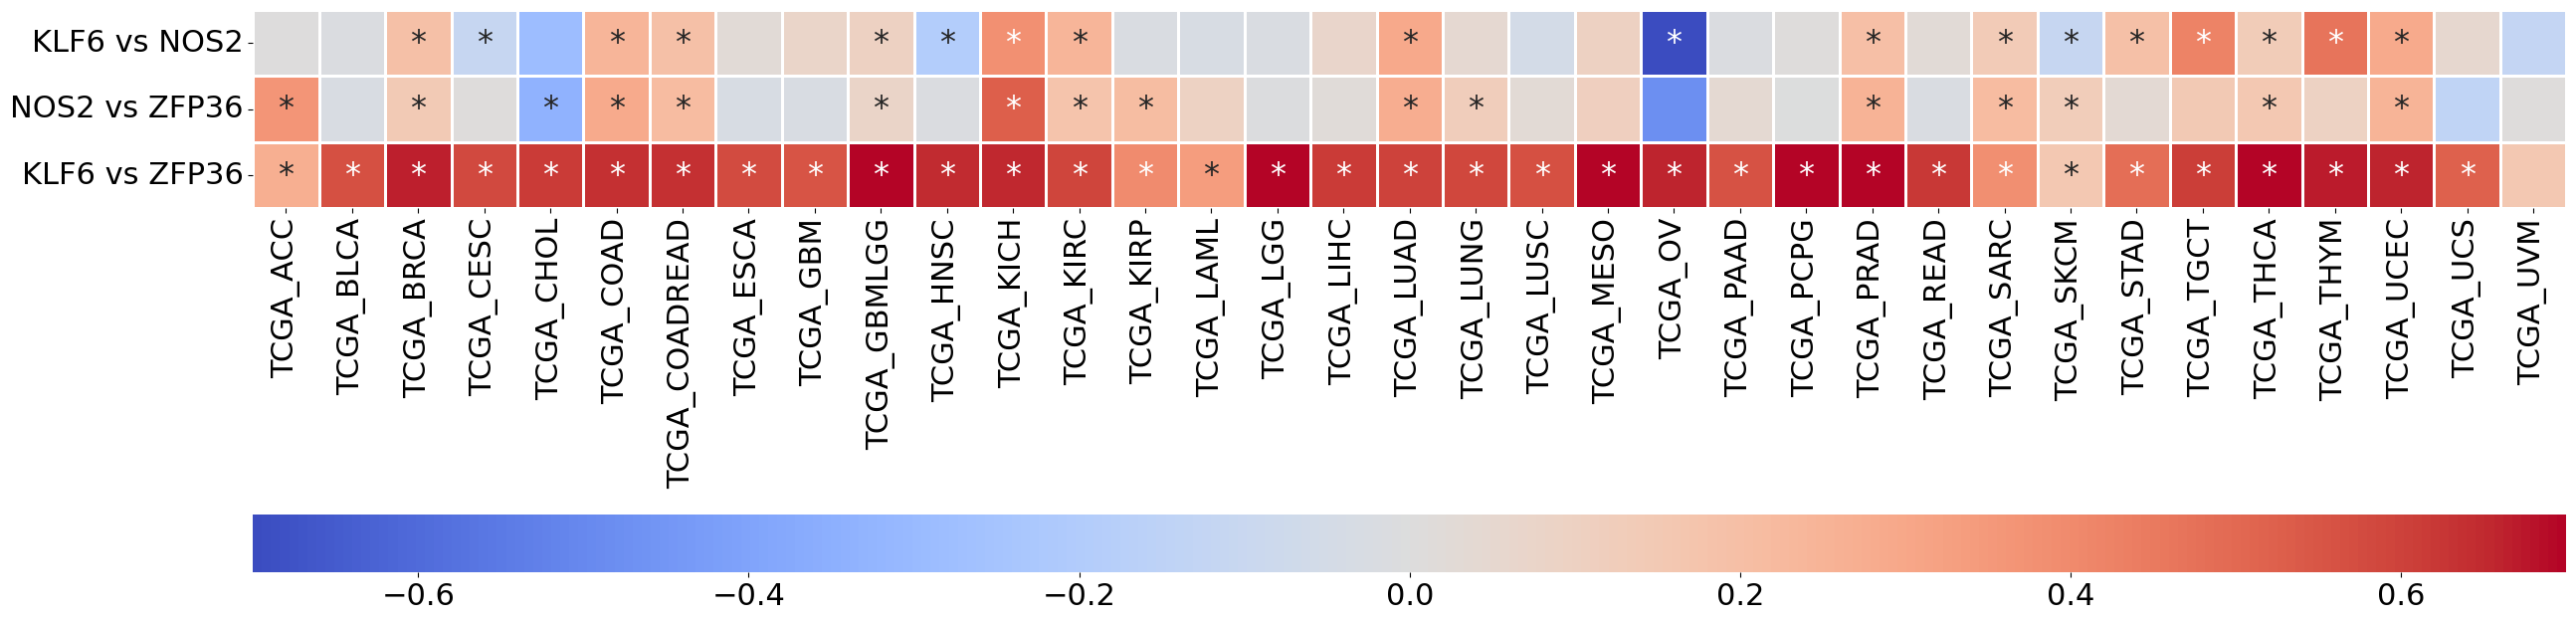

In [24]:
fig_1_spear = Corr_Tab_Gly
fig_1_spear_star = Corr_Tab_Gly_star

plt.figure(figsize=(30,20))
plt.rcParams['figure.dpi']= 100
#sns.set(rc={'figure.figsize':(10,10)})

#plt.title('Correlations of RKIP and BACH1 with KS Gene Signatures (Spearman coefficients)', size=20)
ax = sns.heatmap(fig_1_spear, linewidths = 1,  cmap="coolwarm", square = True, fmt="",vmax = 0.7, vmin =-0.7, annot = fig_1_spear_star
            ,cbar_kws={'orientation': 'horizontal', 'pad' : 0.20, 'aspect': 40}, annot_kws={'size': 23} )
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
#plt.ylabel('Gene/Pathway',  labelpad = 20)
plt.tick_params(axis='both', labelsize=22)
plt.xticks(rotation = 90 )
#plt.xlabel('Cancer Type', labelsize=22 )

In [33]:
pd.DataFrame(fig_1_spear.T.sort_values(by="KLF6 vs ZFP36",ascending=False).head(10).loc[:,'KLF6 vs ZFP36']).to_csv("Top_10_Positive_Correlation_observed_in_TCGA_Cancer_DataSets.csv")